In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from typing import Optional

# Set more basic style settings that will work in VSCode
plt.style.use('default')
sns.set_theme()  # This is a more modern way to set seaborn style

In [4]:
# Read the combined matches data
df = pd.read_csv('../data/combined_matches.csv')

# Convert tourney_date to datetime if it's not already
df['tourney_date'] = pd.to_datetime(df['tourney_date'])

# Filter matches from 1990 onwards
df_filtered = df[df['tourney_date'] >= '1990-01-01'].copy()

# Display basic information about the filtered dataset
print(f"Original number of matches: {len(df)}")
print(f"Number of matches from 1990 onwards: {len(df_filtered)}")
print(f"Percentage of matches retained: {(len(df_filtered) / len(df) * 100):.2f}%")

# Display the date range of the filtered dataset
print(f"\nDate range of filtered dataset:")
print(f"Earliest match: {df_filtered['tourney_date'].min()}")
print(f"Latest match: {df_filtered['tourney_date'].max()}")

Original number of matches: 916648
Number of matches from 1990 onwards: 814541
Percentage of matches retained: 88.86%

Date range of filtered dataset:
Earliest match: 1990-01-01 00:00:00
Latest match: 2024-12-18 00:00:00


In [5]:
# Save the filtered dataset
output_file = '../data/combined_matches_1990_2024.csv'
df_filtered.to_csv(output_file, index=False)
print(f"Saved filtered dataset to {output_file}")

Saved filtered dataset to ../data/combined_matches_1990_2024.csv


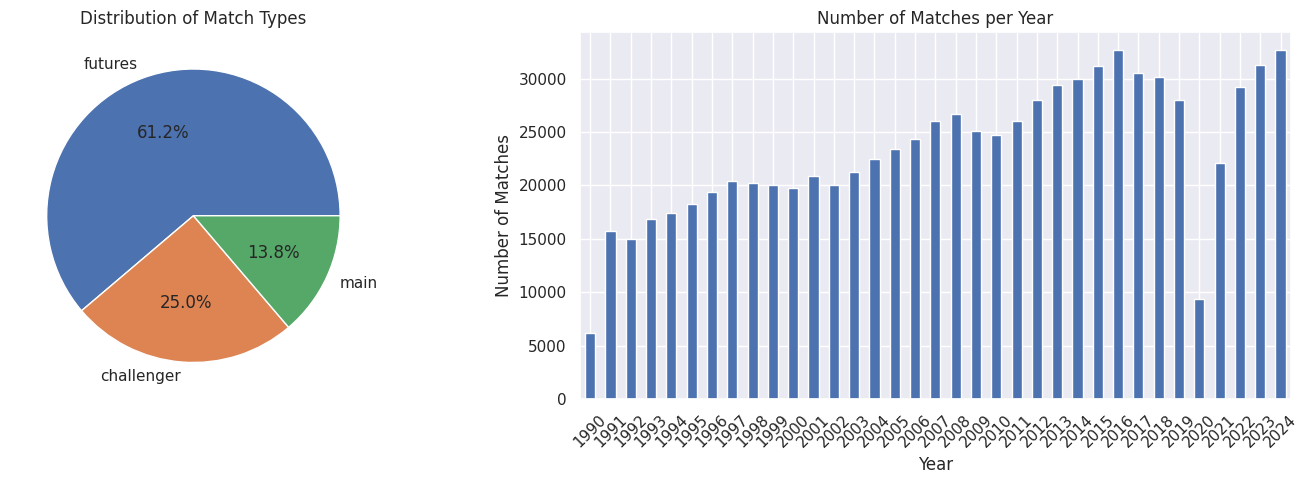

In [6]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Distribution of match types
match_type_counts = df_filtered['match_type'].value_counts()
ax1.pie(match_type_counts, labels=match_type_counts.index, autopct='%1.1f%%')
ax1.set_title('Distribution of Match Types')

# Plot 2: Matches per year
yearly_counts = df_filtered['tourney_date'].dt.year.value_counts().sort_index()
yearly_counts.plot(kind='bar', ax=ax2)
ax2.set_title('Number of Matches per Year')
ax2.set_xlabel('Year')
ax2.set_ylabel('Number of Matches')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [7]:
# Get a concise summary of data types and missing values
print("Data Types and Missing Values Summary:")
missing_info = pd.DataFrame({
    'dtype': df_filtered.dtypes,
    'missing': df_filtered.isnull().sum(),
    'missing_pct': (df_filtered.isnull().sum() / len(df_filtered) * 100).round(2)
})
print(missing_info[missing_info['missing'] > 0])  # Only show columns with missing values

Data Types and Missing Values Summary:
                      dtype  missing  missing_pct
surface              object       53         0.01
winner_seed         float64   449337        55.16
winner_entry         object   664335        81.56
winner_ht           float64   247849        30.43
winner_age          float64     4130         0.51
loser_seed          float64   625809        76.83
loser_entry          object   547412        67.20
loser_hand           object       15         0.00
loser_ht            float64   344840        42.34
loser_ioc            object        9         0.00
loser_age           float64     8122         1.00
score                object       68         0.01
minutes             float64   607399        74.57
w_ace               float64   600372        73.71
w_df                float64   600372        73.71
w_svpt              float64   600372        73.71
w_1stIn             float64   600372        73.71
w_1stWon            float64   600372        73.71
w_2ndWon   

In [8]:
# Check key numeric columns for anomalies
numeric_cols = ['winner_rank', 'loser_rank', 'winner_ht', 'loser_ht', 'winner_age', 'loser_age']
numeric_summary = df_filtered[numeric_cols].agg(['count', 'min', 'max', 'mean', 'std']).round(2)
print("\nNumeric Columns Summary:")
print(numeric_summary)

# Check for obviously incorrect values
print("\nPotential anomalies:")
anomalies = {
    'Heights under 150cm or over 220cm': len(df_filtered[
        ((df_filtered['winner_ht'] < 150) | (df_filtered['winner_ht'] > 220)) |
        ((df_filtered['loser_ht'] < 150) | (df_filtered['loser_ht'] > 220))
    ]),
    'Ages under 14 or over 50': len(df_filtered[
        ((df_filtered['winner_age'] < 14) | (df_filtered['winner_age'] > 50)) |
        ((df_filtered['loser_age'] < 14) | (df_filtered['loser_age'] > 50))
    ]),
    'Invalid ranks (< 1)': len(df_filtered[
        (df_filtered['winner_rank'] < 1) | (df_filtered['loser_rank'] < 1)
    ])
}
for k, v in anomalies.items():
    print(f"{k}: {v} entries")


Numeric Columns Summary:
       winner_rank  loser_rank  winner_ht   loser_ht  winner_age  loser_age
count    772417.00   711513.00  566692.00  469701.00   810411.00  806419.00
min           1.00        1.00       3.00       3.00       14.00      14.00
max        2257.00     2267.00     211.00     211.00       63.40      63.40
mean        478.35      594.17     184.24     184.13       23.85      23.44
std         371.51      456.08       8.11       8.31        3.84       4.03

Potential anomalies:
Heights under 150cm or over 220cm: 1151 entries
Ages under 14 or over 50: 56 entries
Invalid ranks (< 1): 0 entries


In [9]:
# Check categorical columns
categorical_cols = ['surface', 'tourney_level', 'round', 'winner_hand', 'loser_hand']

print("Value counts for key categorical columns:")
for col in categorical_cols:
    print(f"\n{col}:")
    print(df_filtered[col].value_counts(dropna=False).head())  # Show only top 5 values

Value counts for key categorical columns:

surface:
surface
Clay      391702
Hard      365446
Carpet     34929
Grass      22411
NaN           53
Name: count, dtype: int64

tourney_level:
tourney_level
S     429781
C     173525
A      79983
15     42862
G      28629
Name: count, dtype: int64

round:
round
R32    363107
R16    186110
QF      93009
SF      46584
Q1      30891
Name: count, dtype: int64

winner_hand:
winner_hand
R    654644
L     94643
U     64970
A       284
Name: count, dtype: int64

loser_hand:
loser_hand
R      608173
U      119971
L       86054
A         328
NaN        15
Name: count, dtype: int64


In [10]:
# Create a data quality report
def get_column_quality_score(series: pd.Series) -> float:
    """Calculate a simple quality score (0-100) for a column based on missing values and unique ratio"""
    missing_penalty = (series.isnull().mean() * 100)
    return max(0, 100 - missing_penalty)

quality_scores = pd.DataFrame({
    'quality_score': {col: get_column_quality_score(df_filtered[col]) for col in df_filtered.columns}
}).sort_values('quality_score')

print("Column Quality Scores (lower scores indicate more issues):")
print(quality_scores[quality_scores['quality_score'] < 95])  # Show only problematic columns

Column Quality Scores (lower scores indicate more issues):
                    quality_score
winner_entry            18.440570
loser_seed              23.170350
minutes                 25.430519
w_SvGms                 26.292967
l_SvGms                 26.292967
w_1stWon                26.293213
w_svpt                  26.293213
w_ace                   26.293213
w_bpFaced               26.293213
l_svpt                  26.293213
l_df                    26.293213
l_ace                   26.293213
w_2ndWon                26.293213
w_bpSaved               26.293213
w_1stIn                 26.293213
w_df                    26.293213
l_bpSaved               26.293213
l_2ndWon                26.293213
l_1stWon                26.293213
l_bpFaced               26.293213
l_1stIn                 26.293213
loser_entry             32.795034
winner_seed             44.835558
loser_ht                57.664501
winner_ht               69.571943
loser_rank_points       86.211130
loser_rank             

In [11]:
def clean_tennis_data(df: pd.DataFrame) -> pd.DataFrame:
    """Clean the tennis dataset for ML modeling"""
    df = df.copy()
    
    # 1. Remove or fix critical missing values
    critical_columns = [
        'tourney_date', 'surface', 'winner_id', 'loser_id',
        'score', 'winner_rank', 'loser_rank'
    ]
    df = df.dropna(subset=['tourney_date', 'winner_id', 'loser_id', 'score'])
    
    # 2. Handle surface (important feature)
    df['surface'] = df['surface'].fillna('Unknown')
    
    # 3. Clean and standardize player statistics
    # Handle heights (remove obvious errors and fill with median)
    height_mask = (df['winner_ht'].between(150, 220)) & (df['loser_ht'].between(150, 220))
    winner_median_height = df[height_mask]['winner_ht'].median()
    loser_median_height = df[height_mask]['loser_ht'].median()
    
    df['winner_ht'] = df['winner_ht'].apply(
        lambda x: x if pd.notnull(x) and 150 <= x <= 220 else winner_median_height
    )
    df['loser_ht'] = df['loser_ht'].apply(
        lambda x: x if pd.notnull(x) and 150 <= x <= 220 else loser_median_height
    )
    
    # 4. Clean age data
    age_mask = (df['winner_age'].between(14, 50)) & (df['loser_age'].between(14, 50))
    winner_median_age = df[age_mask]['winner_age'].median()
    loser_median_age = df[age_mask]['loser_age'].median()
    
    df['winner_age'] = df['winner_age'].apply(
        lambda x: x if pd.notnull(x) and 14 <= x <= 50 else winner_median_age
    )
    df['loser_age'] = df['loser_age'].apply(
        lambda x: x if pd.notnull(x) and 14 <= x <= 50 else loser_median_age
    )
    
    # 5. Standardize categorical variables
    # Handle player hands
    df['winner_hand'] = df['winner_hand'].map({'R': 'R', 'L': 'L', 'U': 'U'}).fillna('U')
    df['loser_hand'] = df['loser_hand'].map({'R': 'R', 'L': 'L', 'U': 'U'}).fillna('U')
    
    # 6. Tournament level standardization
    level_map = {
        'G': 'Grand Slam',
        'M': 'Masters',
        'A': 'ATP',
        'C': 'Challenger',
        'S': 'Satellite',
        'F': 'Tour Final',
        'D': 'Davis Cup'
    }
    df['tourney_level'] = df['tourney_level'].map(level_map).fillna('Other')
    
    # 7. Handle missing ranks and rank points
    df['winner_rank'] = df['winner_rank'].fillna(df['winner_rank'].median())
    df['loser_rank'] = df['loser_rank'].fillna(df['loser_rank'].median())
    df['winner_rank_points'] = df['winner_rank_points'].fillna(0)
    df['loser_rank_points'] = df['loser_rank_points'].fillna(0)
    
    return df

# Apply cleaning
df_cleaned = clean_tennis_data(df_filtered)

# Show cleaning results
print("Data shape after cleaning:", df_cleaned.shape)
print("\nMissing values after cleaning:")
missing_after = df_cleaned.isnull().sum()
print(missing_after[missing_after > 0])

Data shape after cleaning: (814473, 50)

Missing values after cleaning:
winner_seed     449307
winner_entry    664280
loser_seed      625767
loser_entry     547361
loser_ioc            9
minutes         607331
w_ace           600304
w_df            600304
w_svpt          600304
w_1stIn         600304
w_1stWon        600304
w_2ndWon        600304
w_SvGms         600307
w_bpSaved       600304
w_bpFaced       600304
l_ace           600304
l_df            600304
l_svpt          600304
l_1stIn         600304
l_1stWon        600304
l_2ndWon        600304
l_SvGms         600307
l_bpSaved       600304
l_bpFaced       600304
dtype: int64


In [13]:
from typing import Dict, Tuple

class TennisEloSystem:
    def __init__(
        self,
        initial_rating: float = 1500.0,
        k_factor: float = 32.0,
        rating_difference_base: float = 400.0,
        min_rating: float = 1000.0
    ):
        self.initial_rating = initial_rating
        self.k_factor = k_factor
        self.rating_difference_base = rating_difference_base
        self.min_rating = min_rating
        self.player_ratings: Dict[str, float] = {}
        
    def get_player_rating(self, player_id: str) -> float:
        """Get player's current Elo rating"""
        return self.player_ratings.get(player_id, self.initial_rating)
    
    def calculate_expected_score(self, rating_a: float, rating_b: float) -> float:
        """Calculate expected score for player A against player B"""
        return 1.0 / (1.0 + 10.0 ** ((rating_b - rating_a) / self.rating_difference_base))
    
    def update_ratings(
        self,
        winner_id: str,
        loser_id: str,
        tournament_level: str
    ) -> Tuple[float, float]:
        """Update Elo ratings after a match"""
        # Get current ratings
        winner_rating = self.get_player_rating(winner_id)
        loser_rating = self.get_player_rating(loser_id)
        
        # Adjust K-factor based on tournament level
        adjusted_k = self._adjust_k_factor(tournament_level)
        
        # Calculate expected scores
        winner_expected = self.calculate_expected_score(winner_rating, loser_rating)
        loser_expected = 1.0 - winner_expected
        
        # Update ratings
        winner_new_rating = max(
            self.min_rating,
            winner_rating + adjusted_k * (1.0 - winner_expected)
        )
        loser_new_rating = max(
            self.min_rating,
            loser_rating + adjusted_k * (0.0 - loser_expected)
        )
        
        # Store new ratings
        self.player_ratings[winner_id] = winner_new_rating
        self.player_ratings[loser_id] = loser_new_rating
        
        return winner_new_rating, loser_new_rating
    
    def _adjust_k_factor(self, tournament_level: str) -> float:
        """Adjust K-factor based on tournament importance"""
        k_multipliers = {
            'G': 1.2,  # Grand Slams
            'M': 1.1,  # Masters
            'A': 1.0,  # ATP
            'C': 0.9,  # Challenger
            'S': 0.8,  # Satellite
            'F': 1.1,  # Tour Final
            'D': 1.0   # Davis Cup
        }
        return self.k_factor * k_multipliers.get(tournament_level, 1.0)

def calculate_historical_elos(df: pd.DataFrame) -> pd.DataFrame:
    """Calculate historical Elo ratings for all matches"""
    df = df.sort_values('tourney_date').copy()
    elo_system = TennisEloSystem()
    
    # Initialize columns for storing Elo ratings
    df['winner_elo'] = 0.0
    df['loser_elo'] = 0.0
    
    # Process matches chronologically
    for idx, match in df.iterrows():
        # Get current Elos before the match
        current_winner_elo = elo_system.get_player_rating(str(match['winner_id']))
        current_loser_elo = elo_system.get_player_rating(str(match['loser_id']))
        
        # Store current Elos
        df.at[idx, 'winner_elo'] = current_winner_elo
        df.at[idx, 'loser_elo'] = current_loser_elo
        
        # Update Elos after the match
        elo_system.update_ratings(
            str(match['winner_id']),
            str(match['loser_id']),
            match['tourney_level']
        )
    
    return df

# Calculate historical Elos
print("Calculating historical Elo ratings...")
df_with_elo = calculate_historical_elos(df_cleaned)

# Show some statistics about the Elo ratings
print("\nElo Rating Statistics:")
print(df_with_elo[['winner_elo', 'loser_elo']].describe())

# Save intermediate result
df_with_elo.to_csv('../data/matches_with_elo.csv', index=False)
print("\nSaved matches with Elo ratings to data/matches_with_elo.csv")

Calculating historical Elo ratings...

Elo Rating Statistics:
          winner_elo      loser_elo
count  814473.000000  814473.000000
mean     1744.596886    1672.819355
std       231.887183     226.635181
min      1157.568580    1156.155191
25%      1566.147158    1493.433045
50%      1711.140815    1615.109201
75%      1876.566208    1813.584400
max      2943.958052    2944.545608

Saved matches with Elo ratings to data/matches_with_elo.csv


In [17]:
# Function to create features for XGBoost
def create_xgb_features(df: pd.DataFrame) -> pd.DataFrame:
    """Create features for XGBoost model from tennis match data"""
    # Create a copy to avoid modifying original
    df_features = df.copy()
    
    # 1. Elo-based features (removed the redundant elo_expected_win_prob)
    df_features['elo_difference'] = df_features['winner_elo'] - df_features['loser_elo']
    df_features['elo_avg'] = (df_features['winner_elo'] + df_features['loser_elo']) / 2
    
    # 2. Ranking-based features
    df_features['rank_difference'] = df_features['loser_rank'] - df_features['winner_rank']  # Higher ranks are worse
    df_features['rank_ratio'] = df_features['loser_rank'] / df_features['winner_rank'].replace(0, 1)
    
    # 3. Physical attribute features
    df_features['age_difference'] = df_features['winner_age'] - df_features['loser_age']
    df_features['height_difference'] = df_features['winner_ht'] - df_features['loser_ht']
    
    # 4. Surface specialization
    # One-hot encode surfaces
    surface_dummies = pd.get_dummies(df_features['surface'], prefix='surface')
    df_features = pd.concat([df_features, surface_dummies], axis=1)
    
    # 5. Tournament importance
    # One-hot encode tournament levels
    level_dummies = pd.get_dummies(df_features['tourney_level'], prefix='tourney')
    df_features = pd.concat([df_features, level_dummies], axis=1)
    
    # 6. Round information
    # One-hot encode rounds
    round_dummies = pd.get_dummies(df_features['round'], prefix='round')
    df_features = pd.concat([df_features, round_dummies], axis=1)
    
    # 7. Player handedness
    hand_w_dummies = pd.get_dummies(df_features['winner_hand'], prefix='winner_hand')
    hand_l_dummies = pd.get_dummies(df_features['loser_hand'], prefix='loser_hand')
    df_features = pd.concat([df_features, hand_w_dummies, hand_l_dummies], axis=1)
    
    # 8. Match type
    match_type_dummies = pd.get_dummies(df_features['match_type'], prefix='match_type')
    df_features = pd.concat([df_features, match_type_dummies], axis=1)
    
    # Select final features for model
    feature_columns = [
        # Elo features (removed elo_expected_win_prob)
        'elo_difference', 'elo_avg',
        
        # Ranking features
        'rank_difference', 'rank_ratio',
        
        # Physical attributes
        'age_difference', 'height_difference',
        
        # Surface one-hot encoded columns
        *[col for col in surface_dummies.columns],
        
        # Tournament level one-hot encoded columns
        *[col for col in level_dummies.columns],
        
        # Round one-hot encoded columns
        *[col for col in round_dummies.columns],
        
        # Hand one-hot encoded columns
        *[col for col in hand_w_dummies.columns],
        *[col for col in hand_l_dummies.columns],
        
        # Match type one-hot encoded columns
        *[col for col in match_type_dummies.columns]
    ]
    
    return df_features[feature_columns]

# Create XGBoost features with redundant feature removed
features_df = create_xgb_features(df)

# Display feature information
print("\nFinal features:")
print(f"Total features: {len(features_df.columns)}")
print("\nFeature categories:")
print(f"- Elo features: 2")  # Updated count
print(f"- Ranking features: 2")
print(f"- Physical attributes: 2")
print(f"- Surface features: {len([c for c in features_df.columns if c.startswith('surface_')])}")
print(f"- Tournament level features: {len([c for c in features_df.columns if c.startswith('tourney_')])}")
print(f"- Round features: {len([c for c in features_df.columns if c.startswith('round_')])}")
print(f"- Handedness features: {len([c for c in features_df.columns if c.startswith('winner_hand_') or c.startswith('loser_hand_')])}")
print(f"- Match type features: {len([c for c in features_df.columns if c.startswith('match_type_')])}")

# Show sample of features
print("\nSample of features (first 5 rows):")
print(features_df.head())

# Save features for XGBoost
features_df.to_csv('../data/cleaned/xgb_features.csv', index=False)
print(f"\nSaved {len(features_df.columns)} features to data/cleaned/xgb_features.csv")


Final features:
Total features: 42

Feature categories:
- Elo features: 2
- Ranking features: 2
- Physical attributes: 2
- Surface features: 5
- Tournament level features: 8
- Round features: 14
- Handedness features: 6
- Match type features: 3

Sample of features (first 5 rows):
   elo_difference  elo_avg  rank_difference  rank_ratio  age_difference  \
0             0.0   1500.0             88.0    4.520000            -2.3   
1             0.0   1500.0            -69.0    0.394737            -3.7   
2             0.0   1500.0             20.0    1.476190            -3.8   
3             0.0   1500.0            -71.0    0.702929            10.0   
4             0.0   1500.0             69.0    1.496403             4.1   

   height_difference  surface_Carpet  surface_Clay  surface_Grass  \
0               -5.0           False         False          False   
1                5.0           False         False          False   
2               10.0           False         False          

In [18]:
# Create a dataset for prediction (reshape from winner/loser to player1/player2 format)
def create_match_prediction_dataset(df: pd.DataFrame) -> pd.DataFrame:
    """Transform match data to create a balanced classification dataset"""
    
    # Create two copies of each match, swapping winner/loser
    matches1 = df.copy()
    matches1['player1_id'] = matches1['winner_id']
    matches1['player2_id'] = matches1['loser_id'] 
    matches1['player1_elo'] = matches1['winner_elo']
    matches1['player2_elo'] = matches1['loser_elo']
    matches1['target'] = 1  # player1 wins
    
    matches2 = df.copy()
    matches2['player1_id'] = matches2['loser_id']
    matches2['player2_id'] = matches2['winner_id']
    matches2['player1_elo'] = matches2['loser_elo']
    matches2['player2_elo'] = matches2['winner_elo']
    matches2['target'] = 0  # player1 loses
    
    # Combine and shuffle
    combined = pd.concat([matches1, matches2], ignore_index=True)
    combined = combined.sample(frac=1, random_state=42).reset_index(drop=True)
    
    # Create symmetrical features
    combined['elo_difference'] = combined['player1_elo'] - combined['player2_elo']
    combined['elo_avg'] = (combined['player1_elo'] + combined['player2_elo']) / 2
    combined['rank_difference'] = combined['player2_rank'] - combined['player1_rank']
    combined['rank_ratio'] = combined['player2_rank'] / combined['player1_rank'].replace(0, 1)
    combined['age_difference'] = combined['player1_age'] - combined['player2_age']
    combined['height_difference'] = combined['player1_ht'] - combined['player2_ht']
    
    # Keep surface, tournament level, round and match type
    # One-hot encode them as before
    
    return combined

In [19]:
def chronological_split(df: pd.DataFrame, test_start_date: str = '2023-01-01') -> Tuple[pd.DataFrame, pd.DataFrame]:
    """Split data chronologically to better simulate real-world prediction"""
    train = df[df['tourney_date'] < test_start_date].copy()
    test = df[df['tourney_date'] >= test_start_date].copy()
    return train, test

In [21]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def train_xgb_model(X_train: pd.DataFrame, y_train: pd.Series, 
                   X_val: pd.DataFrame = None, y_val: pd.Series = None) -> XGBClassifier:
    """Train XGBoost model with hyperparameter tuning"""
    
    # Parameter grid for tuning
    param_grid = {
        'n_estimators': [100, 200, 300, 500],
        'max_depth': [3, 4, 5, 6, 7],
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'subsample': [0.8, 0.9, 1.0],
        'colsample_bytree': [0.8, 0.9, 1.0],
        'min_child_weight': [1, 3, 5, 7],
        'gamma': [0, 0.1, 0.2, 0.3]
    }
    
    # Base model
    xgb = XGBClassifier(
        objective='binary:logistic',
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    )
    
    # Use validation set if provided, otherwise use cross-validation
    if X_val is not None and y_val is not None:
        eval_set = [(X_val, y_val)]
        early_stopping_rounds = 50
    else:
        eval_set = None
        early_stopping_rounds = None
    
    # Hyperparameter tuning
    search = RandomizedSearchCV(
        estimator=xgb,
        param_distributions=param_grid,
        n_iter=25,
        scoring='roc_auc',
        cv=5,
        random_state=42,
        n_jobs=-1
    )
    
    search.fit(
        X_train, y_train,
        eval_set=eval_set,
        early_stopping_rounds=early_stopping_rounds,
        verbose=False
    )
    
    print(f"Best parameters: {search.best_params_}")
    print(f"Best validation score: {search.best_score_:.4f}")
    
    return search.best_estimator_

In [22]:
def evaluate_model(model: XGBClassifier, X_test: pd.DataFrame, y_test: pd.Series) -> Dict:
    """Evaluate model performance with multiple metrics"""
    
    # Predict probabilities and classes
    y_prob = model.predict_proba(X_test)[:, 1]
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    results = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_prob)
    }
    
    print("Model Performance:")
    for metric, value in results.items():
        print(f"{metric}: {value:.4f}")
    
    return results